In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA

# DataSet

In [2]:
df=pd.DataFrame(pd.read_csv('../top_Gads_updated.dat',header=None, comment="#",sep='\s+',
                            squeeze=True, names=["material","adsorbate","DF_lower","DF_upper","DF"]))


df=df[['material', 'adsorbate','DF']]
aminoacid=df["adsorbate"].unique()

n={}
for i in aminoacid:
    n[i]=list(df[df.adsorbate==i]['DF'])    
X=pd.DataFrame(n)

X.head(5) 
print(X.shape)
aminoacids_label=list(df["adsorbate"].unique())
material_label=list(df["material"].unique())

(33, 32)


# Data Preparation

In [3]:
aminacid_order=['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'CYM','GLN','GAN','GLU',
                'HID', 'HIE', 'HIP','ILE', 'LEU', 'LYS', 'MET',
                'PHE', 'SER', 'THR', 'TRP', 'TYR', 'VAL','GLY','PRO',
                 'CHL','PHO', 'ETA','EST', 'PRP', 'BUT-1','BUT-2',  
                'DGL']

In [4]:
X.rename(columns={'C3H6': 'PRP','C4H6': 'BUT-2','C4H8': 'BUT-1'}, inplace=True)
X.rename(index={'C_amorph-1':'C-AM-1', 'C_amorph-2':'C-AM-2', 'C_amorph-3':'C-AM-3',
                'CNT15-COO--10':'CNT-COO$^{-}$-high','CNT15-COO--3':'CNT-COO$^{-}$-low',
                'CNT15-COOH-30':'CNT-COOH-high', 'CNT15-COOH-3':'CNT-COOH-low', 
                'CNT15-NH2-14':'CNT-NH$_{2}$-high', 'CNT15-NH2-2':'CNT-NH$_{2}$-low',
                'CNT15-NH3+-4':'CNT-NH$_{3}^{+}$-high', 'CNT15-NH3+-2':'CNT-NH$^{+}_{3}$-low',
                'CNT15-OH-14':'CNT-OH-high', 'CNT15-OH-4':'CNT-OH-low',
                'CNT15':'CNT', 'Fe2O3-001O':'Fe$_{2}$O$_{3}$(001)',
                'graphene':'GR', 'bi-graphene':'bi-GR', 'tri-graphene':'tri-GR', 'grapheneoxide': 'GO', 'redgrapheneoxide': 'rGO',
                'SiO2-Q2': 'SiO$_{2}$-Q2', 'SiO2-Q4':'SiO$_{2}$-Q4',
                'TiO2-rut-110':'TiO$_{2}$-rut(110)' , 'TiO2-ana-101': 'TiO$_{2}$-ana(101)',
                'TiO2-rut-100':'TiO$_{2}$-rut(100)', 'TiO2-ana-100':'TiO$_{2}$-ana(100)', 
                'TiO2-ana-101-NB':'TiO$_{2}$-ana(101)-NB', 
                'ZnO-1010':'ZnO(10$\overline{1}}$0)', 'ZnO-1210':'ZnO(1$\overline{2}}$10)', 'ZnS-110':'ZnS(110)',
                'ZnS-110-coated':'ZnS(110)-coated'}, inplace=True)

# Principal Component Analysis for Linear Dimensionality Reduction 

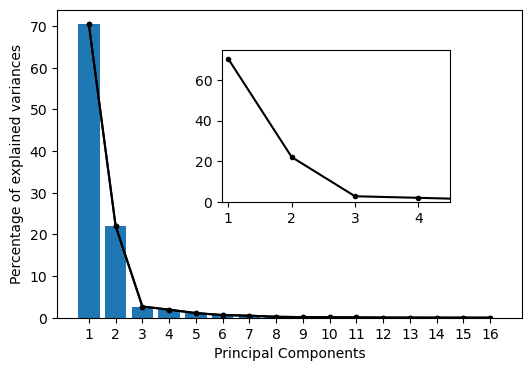

In [5]:
fig, ax1 = plt.subplots()
fig.set_size_inches([6,4])

pca=PCA(n_components ='mle')
X_pca=pca.fit_transform(X)
m=np.array(pca.explained_variance_ratio_)
x=np.array(range(1,17))


plt.bar(x,m*100,color='blue')
plt.plot(x,m*100, marker='.', c='black')


ax1.bar(x,m*100)
ax1.plot(x,m*100, marker='.', c='black')
ax1.set_xticks(np.arange(1,17,1))
ax1.set_xlabel("Principal Components",fontsize=10)
ax1.set_ylabel("Percentage of explained variances",fontsize=10)

left, bottom, width, height = [0.4, 0.4, 0.38, 0.38]
ax2 = fig.add_axes([left, bottom, width, height])
ax2.plot(x,m*100, marker='.', c='black')
ax2.set_xlim([0.9,4.5])
ax2.set_ylim([0,75])

plt.savefig('pca1.png', format='png', dpi=1000, bbox_inches='tight')

plt.show()

# Eigenvectors alaysis along the original features

/tmp/ipykernel_28870/3301103138.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[2].set_xticklabels(aminacid_order, fontsize=16)


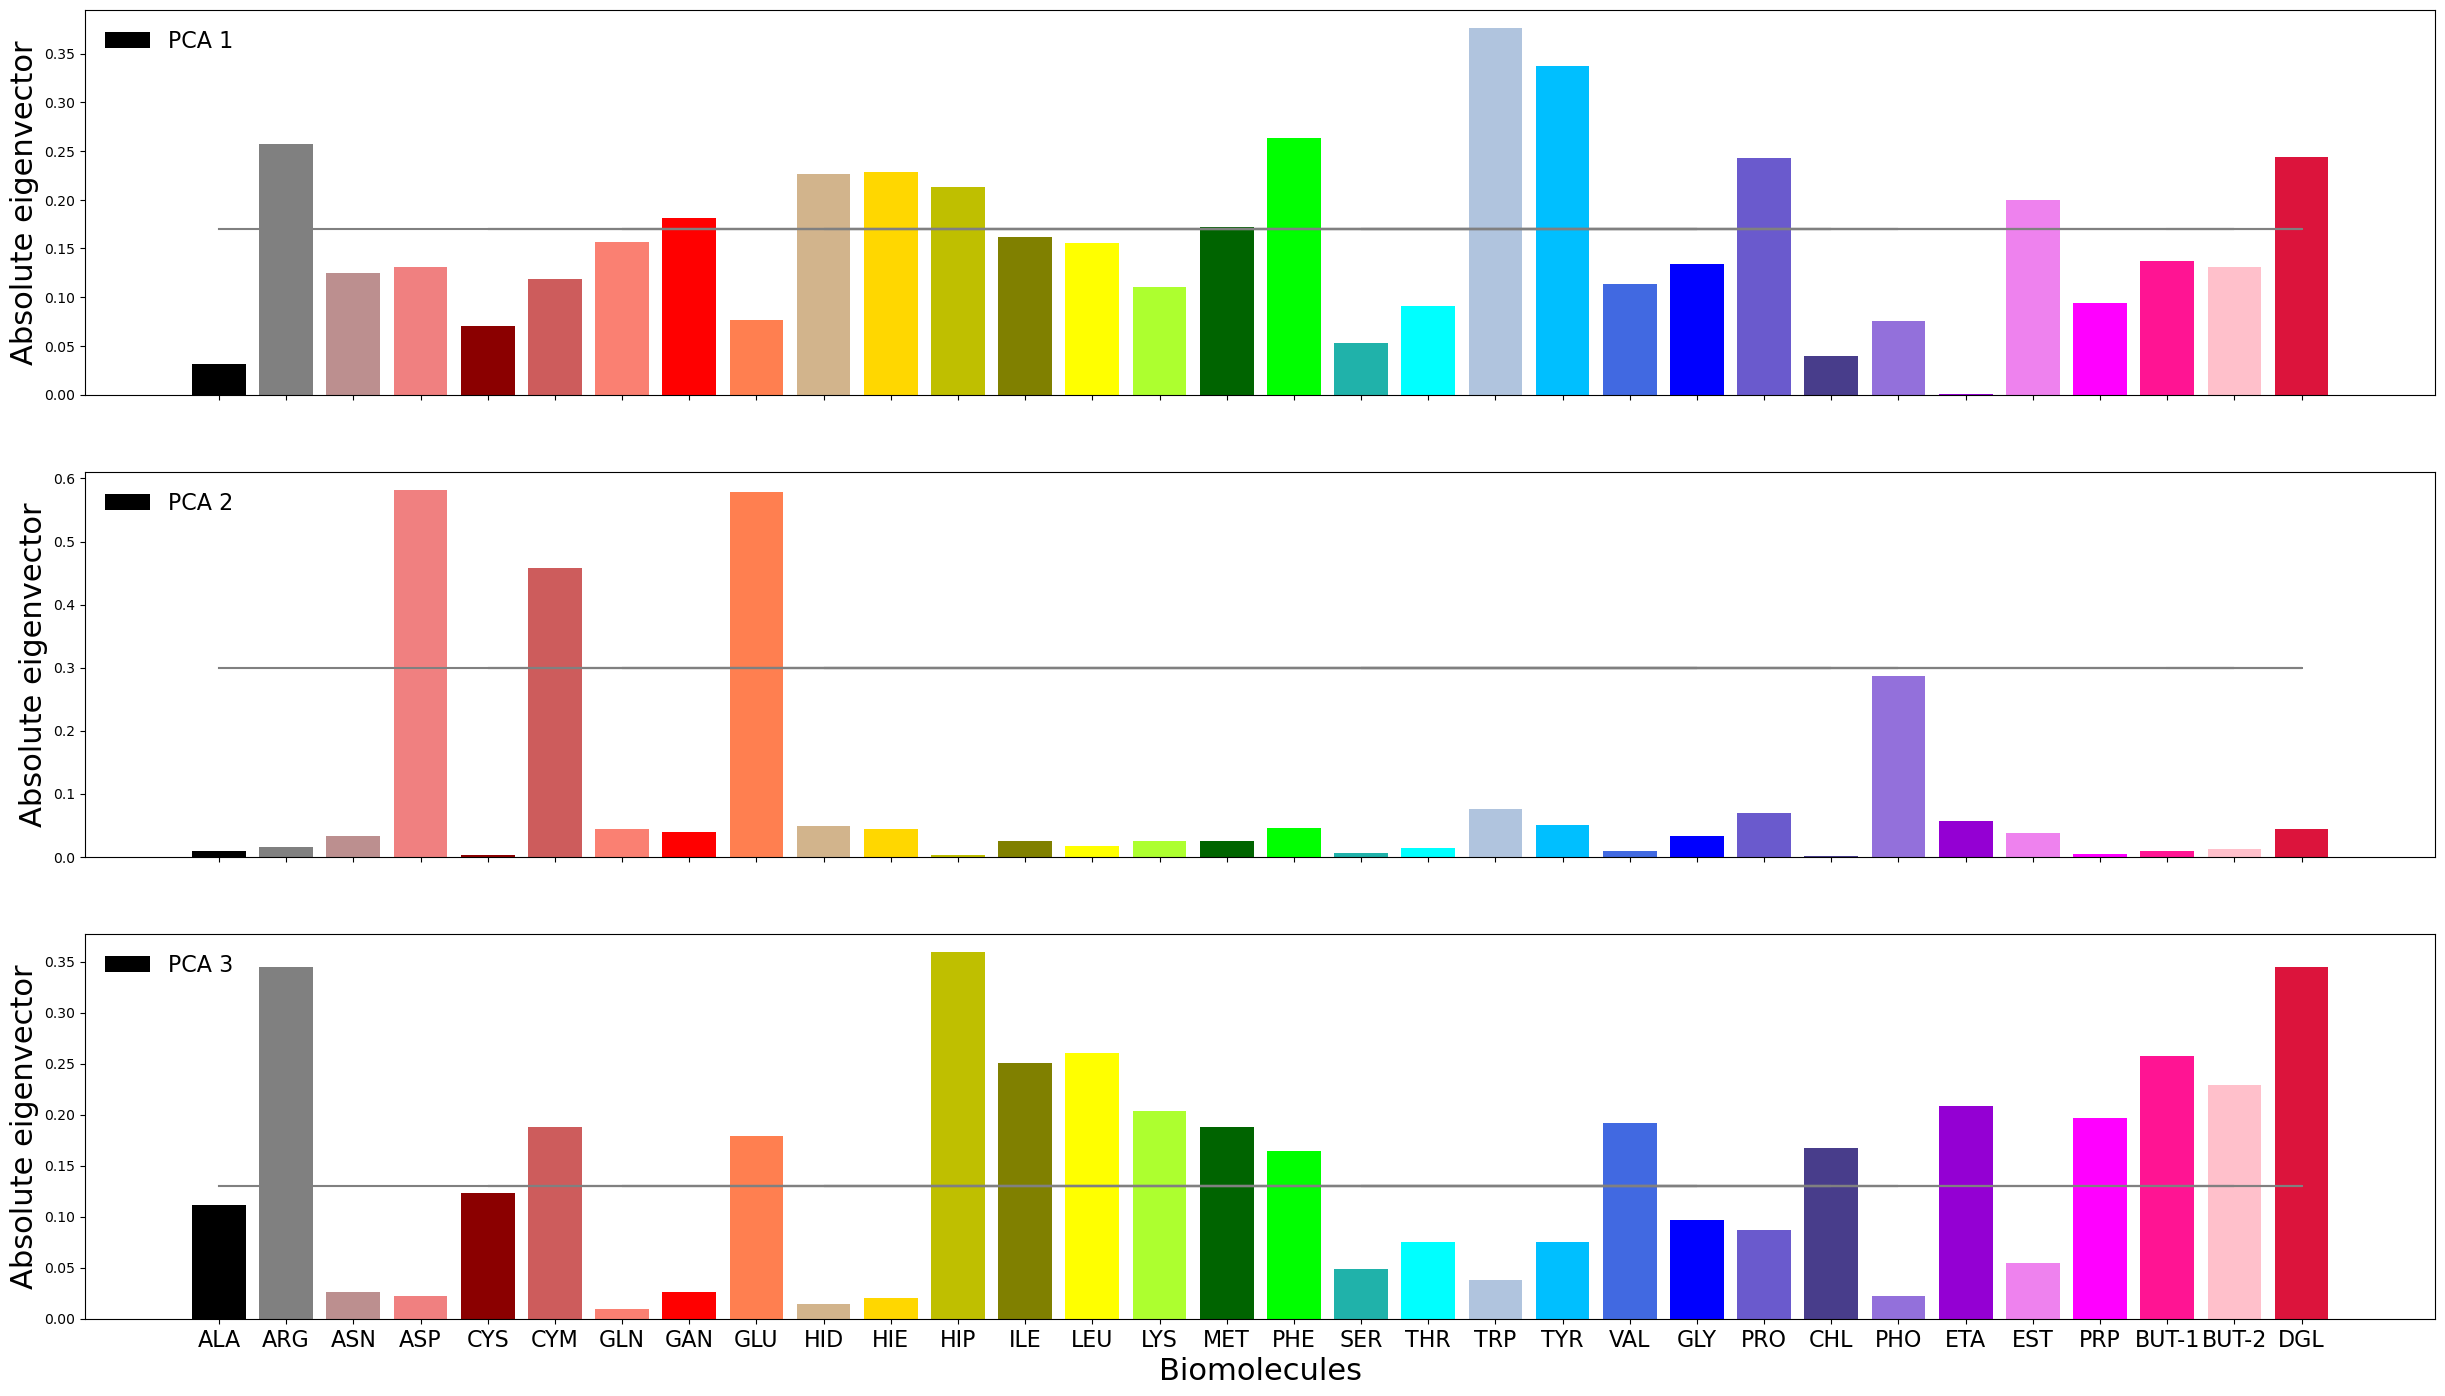

In [6]:
flatui = ["black","grey","rosybrown","lightcoral","darkred","indianred","salmon","red","coral","tan","gold","y","olive","yellow",
          "greenyellow","darkgreen","lime","lightseagreen","aqua","lightsteelblue","deepskyblue","royalblue","blue",
          "slateblue","darkslateblue","mediumpurple","darkviolet","violet","magenta","deeppink","pink","crimson"]
#"ASP",lightcoral", "VAL":"blue","PRO":"darkslateblue"

pca=PCA(n_components=3)
X_pca=pca.fit_transform(X)
m=pca.components_

component_list_0=[]
component_list_1=[]
component_list_2=[]
for i in aminacid_order:    
    component_list_0.append(np.absolute(m[0][X.columns.get_loc(i)]))
    component_list_1.append(np.absolute(m[1][X.columns.get_loc(i)]))
    component_list_2.append(np.absolute(m[2][X.columns.get_loc(i)]))

fig, ax = plt.subplots(3, 1, figsize=(25, 17),sharex=True)
fig.subplots_adjust(left=0.06, right=1, wspace=0.1)    
ax[0].bar(aminacid_order,component_list_0,color=flatui, label='PCA 1')
ax[0].legend(fontsize=16,loc='upper left',frameon = False) 
ax[0].plot(X.columns,np.full(32,0.17),c='gray')
ax[0].set_ylabel('Absolute eigenvector',fontsize=22)

ax[1].bar(aminacid_order,component_list_1,color=flatui,label='PCA 2')
ax[1].legend(fontsize=16,loc='upper left',frameon = False) 
ax[1].plot(X.columns,np.full(32,0.3),c='gray')
ax[1].set_ylabel('Absolute eigenvector',fontsize=22)           
           
ax[2].bar(aminacid_order,component_list_2,color=flatui,label='PCA 3')
ax[2].legend(fontsize=16,loc='upper left',frameon = False) 
ax[2].plot(X.columns,np.full(32,0.13),c='gray')
ax[2].set_ylabel('Absolute eigenvector',fontsize=22)
ax[2].set_xticklabels(aminacid_order, fontsize=16)
ax[2].set_xlabel('Biomolecules',fontsize=22)

         
plt.savefig('pca2.png', format='png', dpi=1000, bbox_inches='tight')